In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
yfinance = pd.read_csv("data/disney_yfinance.csv")
dis_submissions = pd.read_csv("data/disney_all_sub.csv")
dis_comments_500 = pd.read_csv("data/disney_500_comments_w_dates.csv")

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,4,5,6,8,9,10,11,12,16,18,19,20,21,22,24,25,26,27,28,29,30,31,35,37,39,43,44,49,53,56,58,59,60,65,66,67,68,69,74,75,76,77,78,79,80,81,83,85,87,88,89,90,91,92,93,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
yfinance.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,28.855125,29.533344,28.361876,29.471687,23.115255,8402230
1,1/4/2000,29.594999,31.444689,29.594999,31.198063,24.469284,16051191
2,1/5/2000,31.198063,32.677814,31.198063,32.492844,25.484806,19823822
3,1/6/2000,32.492844,32.677814,31.198063,31.198063,24.469284,7903193
4,1/7/2000,31.198063,31.691313,30.396530,30.704813,24.082420,6773543


In [3]:
dis_submissions.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,brand_safe,rte_mode,author_id,previous_visits,suggested_sort,author_created_utc,approved_at_utc,banned_at_utc,view_count,creation_date
0,[],False,The-Remix-God-ALT,0,[],0,text,t2_8b0yo2pg,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021
1,[],False,Supershlee777,0,[],0,text,t2_7zle95u7,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021
2,[],False,theagileartist,0,[],0,text,t2_7ohoma2p,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021
3,[],False,PeachyLeee,0,[],0,text,t2_684v8y3b,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021
4,[],False,artsychimichanga,0,[],0,text,t2_50qxngv9,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021


In [8]:
dis_submissions.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'awarders', 'can_mod_post', 'contest_mode',
       'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'removed_by_category', 'retrieved_on', 'score', 'selftext',
       'send_replies', 'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'title',
       'total_awards_received', 'treatment

In [4]:
drop_columns = [
    'all_awardings', 'author_flair_css_class', 'author_flair_richtext', 'author_patreon_flair', 'author_premium',
    'can_mod_post', 'contest_mode', 'gildings', 'is_crosspostable', 'is_meta', 'is_original_content', 'is_reddit_media_domain', 
    'is_robot_indexable', 'link_flair_background_color', 'link_flair_text_color', 'locked', 'media_only', 'no_follow',
    'parent_whitelist_status', 'permalink', 'pwls', 'removed_by_category', 'send_replies', 'spoiler',
    'url', 'whitelist_status', 'wls', 'link_flair_css_class', 'link_flair_template_id', 'post_hint', 'preview',
    'thumbnail_height', 'thumbnail_width', 'url_overridden_by_dest', 'author_flair_background_color', 'author_flair_template_id',
    'author_flair_text_color', 'is_gallery', 'edited', 'banned_by', 'author_is_blocked', 'author_flair_text', 'author_flair_type',
    'secure_media', 'secure_media_embed', 'author_cakeday'
]

for _ in drop_columns:
    del dis_submissions[_]
        
dis_submissions.columns

Index(['allow_live_comments', 'author', 'author_fullname', 'awarders',
       'created_utc', 'domain', 'full_link', 'id', 'is_self', 'is_video',
       'link_flair_richtext', 'link_flair_type', 'num_comments',
       'num_crossposts', 'over_18', 'pinned', 'retrieved_on', 'score',
       'selftext', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'title',
       'total_awards_received', 'treatment_tags', 'upvote_ratio',
       'link_flair_text', 'media', 'media_embed', 'distinguished',
       'is_created_from_ads_ui', 'gallery_data', 'media_metadata',
       'crosspost_parent', 'crosspost_parent_list', 'gilded',
       'steward_reports', 'updated_utc', 'collections', 'og_description',
       'og_title', 'removed_by', 'brand_safe', 'rte_mode', 'author_id',
       'previous_visits', 'suggested_sort', 'author_created_utc',
       'approved_at_utc', 'banned_at_utc', 'view_count', 'creation_date'],
      dtype='object')

In [7]:
dis_submissions['created_utc']

0        1610296640
1        1610295828
2        1610294416
3        1610293394
4        1610292454
            ...    
80255    1417798928
80256    1417798765
80257    1417795991
80258    1417790770
80259    1417789646
Name: created_utc, Length: 80260, dtype: int64

In [8]:
from datetime import datetime

sub_dates = []

for _ in dis_submissions['created_utc']:
    fts = datetime.utcfromtimestamp(_).strftime('%m-%d-%Y')
    sub_dates.append(fts)

# Appends new column to dataframe, contains readable string date-times
dis_submissions['creation_date'] = sub_dates

In [ ]:
dis_submissions['creation_date']

## Function to append a readable creation date column to subreddit df

In [ ]:
def create_date_reddit(reddit_df):
    sub_dates = []

    for _ in reddit_df['created_utc']:
        fts = datetime.utcfromtimestamp(_).strftime('%m-%d-%Y')
        sub_dates.append(fts)

    # Appends new column to dataframe, contains readable string date-times
    reddit_df['creation_date'] = sub_dates

In [90]:
dis_begin = dis_submissions['creation_date'].iloc[-1]
dis_begin

'12-05-2014'

In [102]:
dis_datetime_object = datetime.strptime(dis_begin, '%m-%d-%Y')
dis_datetime_object

datetime.datetime(2014, 12, 5, 0, 0)

In [114]:
y_begin = yfinance['Date'][0]

In [104]:
y_datetime_object = datetime.strptime(y_begin, '%m/%d/%Y')
y_datetime_object

datetime.datetime(2000, 1, 3, 0, 0)

In [105]:
yfinance['Date'][0].replace('/', '-')

'1-3-2000'

In [112]:
i = 0

for _ in yfinance['Date']:
    y_datetime_object = datetime.strptime(_, '%m/%d/%Y')
    if y_datetime_object == dis_datetime_object:
        print(y_datetime_object)
        print(i)
    i += 1

2014-12-05 00:00:00
3755


In [113]:
yfinance['Date'][3755]

'12/5/2014'

## Function to Created parsed dates columns for yfinance dfs

In [122]:
parsed_dates = []

def yfi_parsed_dates(df):
    for _ in df['Date']:
        y_datetime_object = datetime.strptime(_, '%m/%d/%Y')
        parsed_dates.append(y_datetime_object)
    df['parsed_dates'] = parsed_dates

In [123]:
yfi_parsed_dates(yfinance)

In [130]:
yfinance['parsed_dates'][0]

Timestamp('2000-01-03 00:00:00')

## Function to Created parsed dates columns for subreddit dfs

In [126]:
parsed_dates = []

def red_parsed_dates(df):
    for _ in df['creation_date']:
        red_datetime_object = datetime.strptime(_, '%m-%d-%Y')
        parsed_dates.append(red_datetime_object)
    df['parsed_dates'] = parsed_dates

In [127]:
red_parsed_dates(dis_submissions)

In [131]:
dis_submissions['parsed_dates'][0]

Timestamp('2021-01-10 00:00:00')

## Function to only use yfinance dates in range of subreddit post dates and vice-versa

In [136]:
i = 0
k = 0

reddit_begin = dis_submissions['parsed_dates'].iloc[-1]
yahoo_end = yfinance['parsed_dates'].iloc[-1]

for _ in yfinance['parsed_dates']:
    if _ == reddit_begin:
        print(y_datetime_object)
        print(i)
    i += 1
    
print('-------------')
    
for _ in dis_submissions['parsed_dates']:
    if _ == yahoo_end:
        print(_)
        print(i)
    i += 1

2021-10-29 00:00:00
3755
-------------
2021-10-29 00:00:00
6293
2021-10-29 00:00:00
6294
2021-10-29 00:00:00
6295
2021-10-29 00:00:00
6296
2021-10-29 00:00:00
6297
2021-10-29 00:00:00
6298
2021-10-29 00:00:00
6299
2021-10-29 00:00:00
6300
2021-10-29 00:00:00
6301
2021-10-29 00:00:00
6302
2021-10-29 00:00:00
6303
2021-10-29 00:00:00
6304
2021-10-29 00:00:00
6305
2021-10-29 00:00:00
6306
2021-10-29 00:00:00
6307
2021-10-29 00:00:00
6308
2021-10-29 00:00:00
6309
2021-10-29 00:00:00
6310
2021-10-29 00:00:00
6311
2021-10-29 00:00:00
6312
2021-10-29 00:00:00
6313
2021-10-29 00:00:00
6314
2021-10-29 00:00:00
6315
2021-10-29 00:00:00
6316
2021-10-29 00:00:00
6317
2021-10-29 00:00:00
6318
2021-10-29 00:00:00
6319
2021-10-29 00:00:00
6320
2021-10-29 00:00:00
6321
2021-10-29 00:00:00
6322
2021-10-29 00:00:00
6323
2021-10-29 00:00:00
6324
2021-10-29 00:00:00
6325
2021-10-29 00:00:00
6326
2021-10-29 00:00:00
6327
2021-10-29 00:00:00
17372
2021-10-29 00:00:00
17373
2021-10-29 00:00:00
17374
2021-10-

In [133]:
reddit_begin

Timestamp('2014-12-05 00:00:00')

### Ticker plot of Dis prices from 1/1/2000 to present 11/1/2021

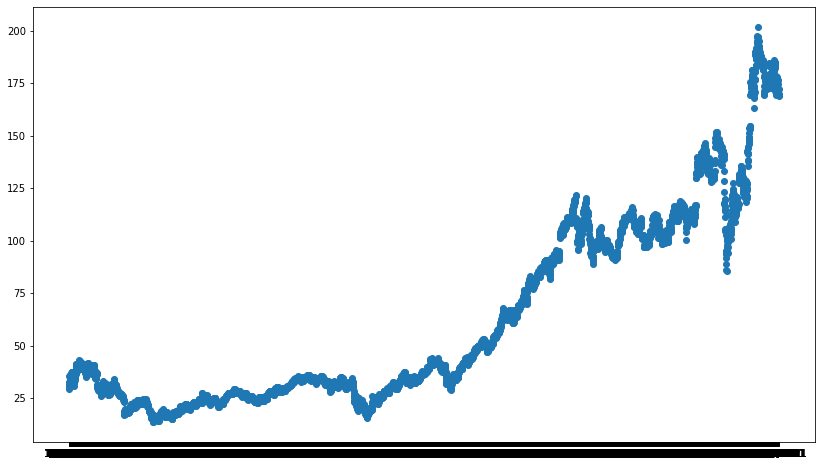

In [21]:
plt.figure(figsize=(14,8))

plt.scatter(yfinance['Date'], yfinance['Close'])

In [35]:
len(yfinance['Date'])

5493

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

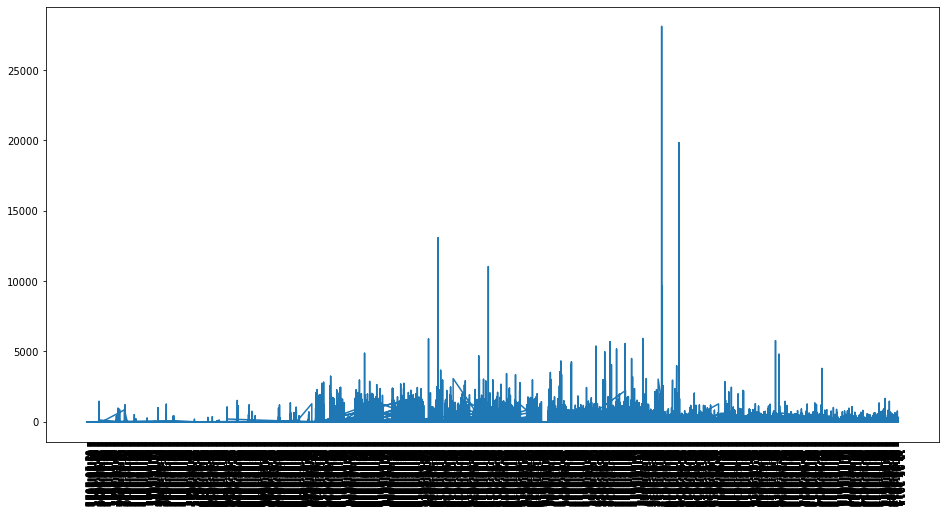

In [12]:
plt.figure(figsize=(16,8))

plt.scatter(dis_submissions['creation_date'], dis_submissions['score'])
plt.xticks(rotation=270)

In [31]:
for _ in np.arange(len(dis_submissions)):
    print(dis_submissions['creation_date'][_])

01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021

10-26-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
10-25-2021
12-01-2021
12-01-2021
12-01-2021
12-01-2021
12-01-2021
12-01-2021
12-01-2021
12-01-2021
12-01-2021
12-01-2021
12-01-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-30-2021
11-29-2021
11-29-2021
11-29-2021
11-29-2021
11-29-2021
11-29-2021
11-29-2021
11-29-2021
11-29-2021
11-29-2021
11-29-2021
11-29-2021
11-29-2021

07-18-2021
07-18-2021
07-18-2021
07-18-2021
07-18-2021
07-18-2021
07-18-2021
07-18-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-17-2021
07-16-2021
07-16-2021
07-16-2021
07-16-2021
07-16-2021
07-16-2021
07-16-2021
07-16-2021
07-16-2021
07-16-2021
07-16-2021
07-16-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021
07-26-2021

01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
01-29-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-09-2021
02-08-2021
02-08-2021
02-08-2021
02-08-2021
02-08-2021
02-08-2021
02-08-2021

10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-30-2021
10-29-2021
10-29-2021
10-29-2021
10-29-2021
10-29-2021
10-29-2021
10-29-2021
10-29-2021
10-29-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-02-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021
11-01-2021

03-22-2020
03-22-2020
03-22-2020
03-22-2020
03-22-2020
03-22-2020
03-22-2020
03-22-2020
03-22-2020
03-22-2020
03-22-2020
01-11-2020
01-11-2020
01-11-2020
01-11-2020
01-11-2020
01-11-2020
01-11-2020
01-11-2020
01-11-2020
01-11-2020
01-11-2020
01-11-2020
01-11-2020
01-11-2020
01-11-2020
01-11-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-10-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-09-2020
01-08-2020
01-08-2020

08-14-2020
08-14-2020
08-14-2020
08-14-2020
08-14-2020
08-14-2020
08-14-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-13-2020
08-12-2020
08-12-2020
08-12-2020
08-12-2020
08-12-2020
08-12-2020
08-12-2020
08-12-2020
08-12-2020
08-12-2020
08-12-2020
08-12-2020
08-12-2020
08-12-2020
08-12-2020
08-12-2020
08-12-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020

08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-20-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020

04-06-2020
04-06-2020
04-06-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-05-2020
04-04-2020
04-04-2020
04-04-2020
04-04-2020
04-04-2020
04-04-2020
04-04-2020
04-04-2020
04-04-2020
04-04-2020
04-04-2020
04-04-2020
04-04-2020
04-04-2020
01-03-2020
01-03-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020
01-02-2020

08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-28-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-27-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020
08-26-2020

03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-28-2020
03-27-2020
03-27-2020
03-27-2020
03-27-2020
03-27-2020
03-27-2020
03-27-2020
03-27-2020
03-27-2020
03-27-2020
03-27-2020
03-27-2020
03-27-2020
03-27-2020
03-27-2020
03-27-2020
03-27-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
04-01-2020
03-25-2020
03-25-2020
03-25-2020
03-25-2020
03-25-2020
03-25-2020
03-25-2020

03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-22-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
03-21-2019
07-11-2019
07-11-2019
07-11-2019
07-11-2019
07-11-2019
07-11-2019
07-11-2019
07-11-2019
07-11-2019
07-11-2019
07-11-2019
07-11-2019
07-11-2019
07-11-2019
07-10-2019
07-10-2019
07-10-2019
07-10-2019
07-10-2019
07-10-2019
07-10-2019
07-10-2019
07-10-2019
07-10-2019

02-28-2019
02-28-2019
02-28-2019
02-28-2019
02-28-2019
02-28-2019
02-28-2019
02-28-2019
02-28-2019
02-28-2019
02-28-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-13-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-12-2019
03-11-2019
03-11-2019
03-11-2019
03-11-2019
03-11-2019
03-11-2019
03-11-2019

11-14-2019
11-14-2019
11-14-2019
11-14-2019
11-14-2019
11-14-2019
11-14-2019
11-14-2019
11-14-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-13-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019
11-23-2019

05-03-2019
05-03-2019
05-03-2019
05-03-2019
05-03-2019
05-03-2019
05-03-2019
05-03-2019
05-03-2019
05-03-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019

09-28-2019
09-28-2019
09-28-2019
09-28-2019
09-28-2019
09-28-2019
09-28-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-27-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-26-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-25-2019
09-24-2019
09-24-2019
09-24-2019
09-24-2019
09-24-2019
11-04-2019
11-04-2019
11-04-2019
11-04-2019
11-04-2019
11-04-2019
11-04-2019
11-04-2019

08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-17-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-16-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
08-15-2018
09-24-2018
09-24-2018
09-24-2018
09-23-2018
09-23-2018
09-23-2018
09-23-2018

02-20-2018
02-20-2018
02-20-2018
02-20-2018
02-20-2018
02-20-2018
02-20-2018
02-20-2018
02-20-2018
02-20-2018
02-20-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-19-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-28-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018
02-27-2018

10-06-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-05-2018
10-04-2018
10-04-2018
10-04-2018
10-04-2018
10-04-2018
10-04-2018
10-04-2018
10-04-2018
10-04-2018
10-04-2018
10-04-2018
10-04-2018
10-04-2018
09-11-2018
09-11-2018
09-11-2018
09-11-2018
09-11-2018
09-11-2018
09-11-2018
09-11-2018
09-11-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018
09-10-2018

07-31-2018
07-31-2018
07-31-2018
07-31-2018
07-31-2018
07-31-2018
07-31-2018
07-31-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-30-2018
07-29-2018
07-29-2018
07-29-2018
07-29-2018
07-29-2018
07-29-2018
07-29-2018
07-29-2018
07-29-2018
07-29-2018
07-29-2018
07-29-2018
07-29-2018
07-29-2018
07-29-2018
07-29-2018
07-29-2018
08-10-2018
08-10-2018
08-10-2018
08-10-2018
08-10-2018
08-10-2018
08-10-2018
08-10-2018
08-10-2018
08-10-2018
08-10-2018
08-10-2018
08-10-2018
08-10-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018
08-09-2018

10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-27-2017
10-26-2017
10-26-2017
10-26-2017
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-22-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016
12-21-2016

03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
03-01-2017
12-29-2016
12-29-2016
12-29-2016
12-29-2016
12-29-2016
12-29-2016
12-29-2016
12-29-2016
12-29-2016
12-29-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-28-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-27-2016
12-26-2016
12-26-2016
12-26-2016
12-26-2016
12-26-2016

11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-07-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-21-2017
11-20-2017
11-20-2017
11-20-2017
11-20-2017
11-20-2017
11-20-2017
11-20-2017
11-20-2017
11-20-2017
11-20-2017
11-20-2017
11-20-2017
11-20-2017
11-20-2017
11-20-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-19-2017
11-18-2017
11-18-2017
11-18-2017
11-18-2017
11-18-2017

08-19-2017
08-19-2017
08-19-2017
08-19-2017
08-19-2017
08-19-2017
08-19-2017
08-19-2017
08-19-2017
08-19-2017
08-19-2017
08-19-2017
08-18-2017
08-18-2017
08-18-2017
08-18-2017
08-18-2017
08-18-2017
08-18-2017
08-18-2017
08-18-2017
08-18-2017
08-18-2017
08-18-2017
08-24-2017
08-24-2017
08-24-2017
08-24-2017
07-31-2017
07-31-2017
07-31-2017
07-31-2017
07-31-2017
07-31-2017
07-31-2017
07-31-2017
07-31-2017
07-31-2017
07-31-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-30-2017
07-29-2017
07-29-2017
07-29-2017
07-29-2017
07-29-2017
07-29-2017
07-29-2017
07-29-2017
07-29-2017
07-29-2017
07-29-2017
07-29-2017
07-29-2017
07-29-2017
07-29-2017
07-29-2017
07-29-2017
07-17-2017
07-17-2017

12-17-2015
12-17-2015
12-17-2015
12-17-2015
12-17-2015
12-17-2015
12-17-2015
12-17-2015
12-17-2015
12-17-2015
12-17-2015
12-17-2015
12-16-2015
12-16-2015
12-16-2015
12-16-2015
12-16-2015
12-16-2015
12-16-2015
12-16-2015
12-16-2015
12-16-2015
01-09-2016
01-09-2016
01-09-2016
01-09-2016
01-09-2016
01-09-2016
01-09-2016
01-09-2016
01-09-2016
01-09-2016
01-09-2016
01-09-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-08-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016
01-07-2016

05-29-2016
05-29-2016
05-29-2016
05-29-2016
05-29-2016
05-29-2016
05-29-2016
05-29-2016
05-29-2016
05-29-2016
05-29-2016
05-29-2016
05-29-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-28-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-27-2016
05-26-2016
05-26-2016
05-26-2016
05-26-2016
05-26-2016
05-26-2016
05-26-2016
05-26-2016
05-26-2016
05-26-2016
05-26-2016
05-26-2016
05-26-2016
05-26-2016
05-26-2016
05-26-2016

05-23-2016
05-23-2016
05-23-2016
05-23-2016
05-23-2016
05-23-2016
05-23-2016
05-23-2016
05-23-2016
05-23-2016
05-23-2016
05-23-2016
05-19-2016
05-19-2016
05-19-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-18-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
05-17-2016
02-03-2016
02-03-2016
02-03-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016
02-02-2016

04-29-2015
04-29-2015
04-29-2015
04-29-2015
04-29-2015
04-29-2015
04-29-2015
04-29-2015
04-29-2015
04-29-2015
04-29-2015
04-29-2015
04-29-2015
04-29-2015
04-29-2015
04-28-2015
04-28-2015
04-28-2015
04-28-2015
04-28-2015
04-28-2015
04-28-2015
04-28-2015
04-28-2015
04-28-2015
04-28-2015
04-28-2015
04-28-2015
04-28-2015
04-28-2015
04-28-2015
04-28-2015
04-27-2015
04-27-2015
04-27-2015
04-27-2015
04-27-2015
04-27-2015
04-27-2015
04-27-2015
04-27-2015
04-27-2015
04-27-2015
04-27-2015
04-27-2015
04-26-2015
04-26-2015
04-26-2015
04-26-2015
04-26-2015
04-26-2015
04-25-2015
04-25-2015
04-25-2015
04-25-2015
04-25-2015
04-25-2015
04-25-2015
04-25-2015
04-25-2015
04-25-2015
04-24-2015
04-24-2015
04-24-2015
04-24-2015
04-24-2015
04-24-2015
04-24-2015
04-24-2015
04-24-2015
06-07-2015
06-07-2015
06-07-2015
06-07-2015
06-07-2015
06-07-2015
06-07-2015
06-07-2015
06-06-2015
06-06-2015
06-06-2015
06-06-2015
06-06-2015
06-06-2015
06-06-2015
06-06-2015
06-06-2015
06-06-2015
06-06-2015
06-05-2015
06-05-2015

05-25-2015
05-25-2015
05-25-2015
05-25-2015
05-24-2015
05-24-2015
05-24-2015
05-24-2015
05-24-2015
05-24-2015
05-24-2015
05-24-2015
05-24-2015
05-24-2015
05-24-2015
05-23-2015
05-23-2015
05-23-2015
05-23-2015
05-23-2015
05-23-2015
05-23-2015
05-23-2015
05-23-2015
05-23-2015
05-23-2015
05-23-2015
05-23-2015
05-23-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-22-2015
05-21-2015
05-21-2015
05-21-2015
05-21-2015
05-21-2015
05-21-2015
05-21-2015
05-21-2015
05-21-2015
05-21-2015
05-21-2015
05-21-2015
05-21-2015
05-21-2015
05-21-2015
05-21-2015
05-21-2015
03-11-2015
03-11-2015
03-11-2015
03-11-2015
03-11-2015
03-11-2015
03-11-2015
03-11-2015
03-11-2015
03-10-2015
03-10-2015
03-10-2015
03-10-2015
03-10-2015
03-10-2015
03-10-2015
03-10-2015
03-10-2015
03-10-2015
03-10-2015
03-10-2015

07-17-2015
07-17-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-16-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-15-2015
07-14-2015
07-14-2015
07-14-2015
07-14-2015
07-14-2015
07-14-2015
07-14-2015
07-14-2015
07-14-2015
07-14-2015
07-14-2015
07-14-2015
07-14-2015
07-14-2015
07-14-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-03-2015
11-02-2015
11-02-2015
11-02-2015
11-02-2015
11-02-2015
11-02-2015
11-02-2015
11-02-2015
11-02-2015
11-02-2015
11-02-2015
11-02-2015
11-02-2015
11-02-2015

In [34]:
score_dict = {}

len(dis_submissions['creation_date'].unique())

2539

In [27]:
score_arr = []

for _ in np.arange(len(dis_submissions)):
    temp = dis_submissions['creation_date'][_]
    score = 0
    if dis_submissions['creation_date'][_] == temp:
        score += dis_submissions['score'][_]
        score

01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-10-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-09-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021
01-08-2021

02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-19-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-26-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021
02-25-2021

10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
10-23-2021
11-22-2021
11-22-2021
11-22-2021
11-22-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-21-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-20-2021
11-19-2021
11-19-2021
11-19-2021
11-19-2021
11-19-2021
11-19-2021

06-27-2021
06-27-2021
06-27-2021
06-27-2021
06-27-2021
06-27-2021
06-27-2021
06-27-2021
06-27-2021
06-27-2021
06-27-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-26-2021
06-25-2021
06-25-2021
06-25-2021
06-25-2021
06-25-2021
06-25-2021
06-25-2021
06-25-2021
07-03-2021
07-03-2021
07-03-2021
07-03-2021
07-03-2021
07-03-2021
07-03-2021
07-03-2021
07-03-2021
07-03-2021
07-03-2021
07-02-2021
07-02-2021
07-02-2021
07-02-2021
07-02-2021
07-02-2021
07-02-2021
07-02-2021
07-02-2021
07-02-2021
07-02-2021
07-02-2021
07-02-2021
07-02-2021
07-02-2021
07-02-2021
07-02-2021

08-24-2021
08-24-2021
08-24-2021
07-19-2021
07-19-2021
07-19-2021
07-19-2021
07-19-2021
07-19-2021
07-19-2021
07-19-2021
07-19-2021
07-19-2021
07-19-2021
07-19-2021
07-19-2021
07-19-2021
07-19-2021
07-19-2021
07-19-2021
07-12-2021
07-12-2021
07-12-2021
07-12-2021
07-12-2021
07-12-2021
07-12-2021
07-12-2021
07-12-2021
07-12-2021
07-12-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-14-2021
07-22-2021
07-22-2021
07-22-2021
07-22-2021
07-22-2021
07-22-2021
07-22-2021
07-22-2021
07-22-2021
07-22-2021
07-22-2021
07-22-2021
07-22-2021
07-22-2021
07-22-2021
07-29-2021
07-29-2021
07-29-2021
07-29-2021
07-29-2021
07-29-2021
07-29-2021
07-29-2021
07-29-2021
07-29-2021
07-29-2021
09-05-2021
09-05-2021
09-05-2021
09-05-2021
09-05-2021
09-04-2021
09-04-2021
09-04-2021
09-04-2021
09-04-2021

10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-26-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-25-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-24-2020
10-23-2020
10-23-2020
10-23-2020
10-23-2020
11-15-2020
11-15-2020
11-15-2020
11-15-2020
11-15-2020
11-15-2020

06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-19-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-18-2020
06-17-2020
06-17-2020
06-17-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020
07-26-2020

04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-15-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-14-2020
04-21-2020
04-21-2020
04-21-2020
04-21-2020
04-21-2020
04-21-2020
04-21-2020
04-21-2020
04-21-2020
04-21-2020
04-21-2020
04-21-2020

08-06-2020
08-06-2020
08-06-2020
08-06-2020
08-06-2020
08-06-2020
08-06-2020
08-05-2020
08-05-2020
08-05-2020
08-05-2020
08-05-2020
08-05-2020
08-05-2020
08-05-2020
08-05-2020
08-05-2020
08-05-2020
08-05-2020
08-05-2020
08-05-2020
08-05-2020
08-05-2020
08-05-2020
10-14-2020
10-14-2020
10-14-2020
10-14-2020
10-14-2020
10-14-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-13-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020
10-12-2020

02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-15-2019
02-14-2019
02-14-2019
02-14-2019
02-14-2019
02-14-2019
02-14-2019
02-14-2019
02-14-2019
02-14-2019
02-14-2019
02-14-2019
02-14-2019
02-14-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-25-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019
03-24-2019

12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-17-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-16-2018
12-29-2018
12-29-2018
12-29-2018
12-29-2018
12-29-2018
12-29-2018
12-29-2018
12-29-2018
12-29-2018
12-29-2018
12-29-2018
12-29-2018
12-29-2018
12-29-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-28-2018
12-27-2018
12-27-2018
12-27-2018
12-27-2018

10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-16-2019
10-15-2019
10-15-2019
10-15-2019
10-15-2019
10-15-2019
10-15-2019
10-15-2019
10-15-2019
10-15-2019
10-15-2019
10-15-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-25-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019
10-24-2019

05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
05-02-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-18-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019
07-17-2019

11-26-2019
11-26-2019
11-26-2019
11-26-2019
01-13-2019
01-13-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-12-2019
01-11-2019
01-11-2019
01-11-2019
01-11-2019
01-11-2019
01-11-2019
01-11-2019
01-11-2019
01-11-2019
01-11-2019
01-11-2019
01-11-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-19-2019
01-18-2019
01-18-2019
01-18-2019
01-18-2019
01-18-2019
01-18-2019
01-18-2019
01-18-2019
01-18-2019
01-18-2019
01-18-2019
01-18-2019
01-18-2019

04-09-2018
04-09-2018
04-09-2018
04-09-2018
04-09-2018
04-09-2018
04-09-2018
04-09-2018
04-09-2018
04-09-2018
04-09-2018
04-09-2018
04-09-2018
04-09-2018
04-09-2018
04-09-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-08-2018
04-07-2018
04-07-2018
04-07-2018
04-07-2018
04-07-2018
04-07-2018
04-07-2018
04-07-2018
04-07-2018
04-07-2018
04-07-2018
04-07-2018
04-07-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-06-2018
04-05-2018
04-05-2018
04-05-2018
04-05-2018
04-26-2018
04-26-2018
04-26-2018
04-26-2018
04-26-2018
04-26-2018
04-26-2018
04-26-2018
04-26-2018
04-26-2018
04-26-2018
04-26-2018
04-26-2018

06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-27-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
06-26-2018
07-05-2018
07-05-2018
07-05-2018
07-05-2018
07-05-2018
07-05-2018
07-05-2018
07-05-2018
07-05-2018
07-05-2018
07-05-2018
07-05-2018
07-05-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018
07-04-2018

10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-12-2018
10-11-2018
10-11-2018
10-11-2018
10-11-2018
10-11-2018
10-11-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-07-2018
08-06-2018
08-06-2018
08-06-2018
08-06-2018
08-06-2018
08-06-2018
08-06-2018
08-06-2018
08-06-2018
08-06-2018

05-16-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-15-2017
05-14-2017
05-14-2017
05-14-2017
05-14-2017
05-14-2017
05-14-2017
05-14-2017
05-14-2017
05-14-2017
05-14-2017
05-14-2017
05-14-2017
07-10-2017
07-10-2017
07-10-2017
07-10-2017
07-10-2017
07-10-2017
07-10-2017
07-10-2017
07-10-2017
07-10-2017
07-10-2017
07-10-2017
07-10-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-09-2017
07-08-2017
07-08-2017
07-08-2017

07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
07-17-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-08-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-07-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017
09-06-2017

04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-12-2017
04-11-2017
04-11-2017
04-11-2017
04-11-2017
04-11-2017
04-11-2017
04-11-2017
04-11-2017
04-11-2017
04-11-2017
04-11-2017
04-11-2017
04-11-2017
04-11-2017
04-10-2017
04-10-2017
04-10-2017
04-10-2017
04-10-2017
04-10-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-26-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-25-2017
06-24-2017

04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-25-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-24-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-23-2016
04-22-2016
04-22-2016
04-22-2016
04-22-2016
04-22-2016
04-22-2016
04-22-2016
10-26-2016
10-26-2016
10-26-2016
10-26-2016
10-26-2016
10-26-2016
10-26-2016
10-26-2016
10-26-2016
10-26-2016
10-26-2016
10-26-2016
10-26-2016
10-26-2016
10-26-2016
10-26-2016

05-11-2016
05-11-2016
05-11-2016
05-11-2016
05-11-2016
05-11-2016
05-11-2016
05-10-2016
05-10-2016
05-10-2016
05-10-2016
05-10-2016
05-10-2016
05-10-2016
05-10-2016
05-10-2016
05-10-2016
05-10-2016
11-06-2016
11-06-2016
11-06-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-05-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-04-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016
11-03-2016

10-10-2016
10-10-2016
10-10-2016
10-10-2016
10-10-2016
10-10-2016
10-10-2016
10-10-2016
10-10-2016
10-10-2016
10-10-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-18-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-17-2016
10-16-2016
11-20-2016
11-20-2016
11-20-2016
11-20-2016
11-20-2016
11-20-2016
11-20-2016
11-20-2016
11-20-2016
11-20-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016
11-19-2016

07-27-2015
07-27-2015
07-27-2015
07-27-2015
07-27-2015
07-26-2015
07-26-2015
07-26-2015
07-26-2015
07-26-2015
07-26-2015
07-26-2015
07-26-2015
07-26-2015
07-26-2015
07-26-2015
07-25-2015
07-25-2015
07-25-2015
07-25-2015
07-25-2015
07-25-2015
07-25-2015
07-25-2015
07-25-2015
07-25-2015
07-25-2015
07-25-2015
07-25-2015
07-24-2015
07-24-2015
07-24-2015
07-24-2015
07-24-2015
07-24-2015
07-24-2015
07-24-2015
07-24-2015
07-24-2015
07-24-2015
07-24-2015
07-24-2015
05-17-2015
05-17-2015
05-16-2015
05-16-2015
05-16-2015
05-16-2015
05-16-2015
05-16-2015
05-16-2015
05-16-2015
05-16-2015
05-16-2015
05-16-2015
05-16-2015
05-16-2015
05-16-2015
05-16-2015
05-16-2015
05-15-2015
05-15-2015
05-15-2015
05-15-2015
05-15-2015
05-15-2015
05-15-2015
05-15-2015
05-15-2015
05-15-2015
05-15-2015
05-15-2015
05-15-2015
05-15-2015
05-15-2015
05-14-2015
05-14-2015
05-14-2015
05-14-2015
05-14-2015
05-14-2015
05-14-2015
05-14-2015
05-14-2015
05-14-2015
05-14-2015
05-14-2015
05-14-2015
05-13-2015
05-13-2015
05-13-2015

01-31-2015
01-30-2015
01-30-2015
01-30-2015
01-30-2015
01-30-2015
01-30-2015
01-30-2015
01-30-2015
01-30-2015
01-30-2015
01-30-2015
01-30-2015
01-30-2015
01-30-2015
01-30-2015
01-30-2015
01-29-2015
01-29-2015
01-29-2015
01-29-2015
01-29-2015
01-29-2015
01-29-2015
01-29-2015
01-29-2015
01-29-2015
01-29-2015
01-29-2015
01-29-2015
01-29-2015
01-29-2015
01-29-2015
01-28-2015
01-28-2015
01-28-2015
01-28-2015
01-28-2015
01-28-2015
01-28-2015
01-28-2015
01-28-2015
01-28-2015
01-28-2015
01-28-2015
01-28-2015
01-28-2015
01-28-2015
01-27-2015
01-27-2015
01-27-2015
01-27-2015
01-27-2015
01-27-2015
01-27-2015
04-11-2015
04-11-2015
04-11-2015
04-11-2015
04-11-2015
04-11-2015
04-11-2015
04-10-2015
04-10-2015
04-10-2015
04-10-2015
04-10-2015
04-10-2015
04-10-2015
04-10-2015
04-10-2015
04-10-2015
04-10-2015
04-10-2015
04-10-2015
04-10-2015
08-20-2015
08-20-2015
08-19-2015
08-19-2015
08-19-2015
08-19-2015
08-19-2015
08-19-2015
08-19-2015
08-19-2015
08-19-2015
06-09-2015
06-09-2015
06-09-2015
06-09-2015

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

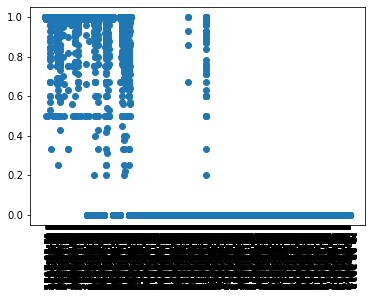

In [13]:
plt.scatter(dis_submissions['creation_date'], dis_submissions['upvote_ratio'])
plt.xticks(rotation=270)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

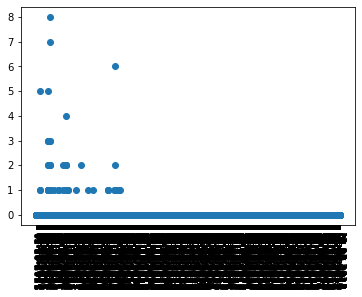

In [19]:
plt.scatter(dis_submissions['creation_date'], dis_submissions['total_awards_received'])
plt.xticks(rotation=270)

In [22]:
X = dis_submissions['score']
y = yfinance['Close']

In [25]:
len(X)

80260

In [26]:
len(y)

5493

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train size: {X_train.shape}')
print(f'y_train size: {y_train.shape}')
print(f'X_test size: {X_test.shape}')
print(f'y_test size: {y_test.shape}')

ValueError: Found input variables with inconsistent numbers of samples: [80260, 5493]

In [ ]:
from sklearn.linear_model import LinearRegression

